## Project- Australia Weather Change Over 8 Years

### Download Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dotenv import load_dotenv
import os

### Download Dataset- ("weatherAUS.csv") in csv

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 


In [2]:
df_AUSWeather = pd.read_csv("weatherAUS.csv",parse_dates=True)

In [3]:
df_AUSWeather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,4/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,5/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/6/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/6/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/6/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/6/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Viewing the data structure

In [4]:
df_AUSWeather.shape 

(145460, 23)

### Dataset information

In [5]:
df_AUSWeather.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Cleaning the Dataset

### Finding null/missing values in the dataset column wise

In [6]:
df_AUSWeather.isna().any() 

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

### Getting total of null/missing values in each column in dataset

In [7]:
df_AUSWeather.isna().sum() 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Ploting the total null/missing values column wise

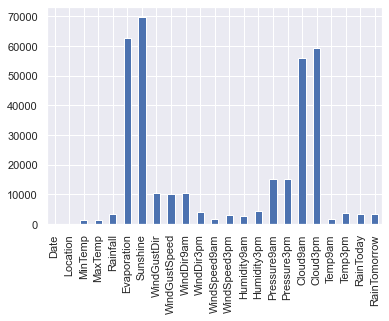

In [8]:
df_AUSWeather.isna().sum().plot(kind='bar') 
plt.show()

### Dropping the columns where 50% of rows with null/missing values compared to total rows in dataset

In [9]:
df_AUSWeather_drop = df_AUSWeather.drop(columns =['Evaporation','Sunshine','Cloud9am','Cloud3pm']) 
                                                                                                   

### Ploting the rest of the missing columns after dropping the above columns

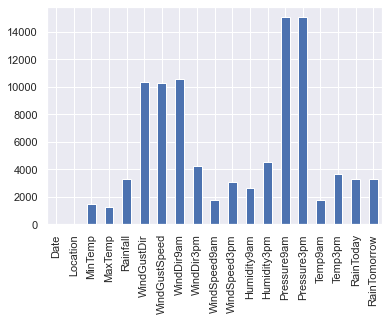

In [10]:
df_AUSWeather_drop.isna().sum().plot(kind='bar')
plt.show()

### Setting Date coulmn to Datetime64 type & creating Year & Month column

In [11]:
df_AUSWeather_drop['Date'] = pd.to_datetime(df_AUSWeather_drop.Date,format ='%d/%m/%Y') #setting Date column to type 'datetime64'
print(df_AUSWeather_drop['Date'].dtype)
df_AUSWeather_drop['Year']=df_AUSWeather_drop['Date'].dt.year #creating Year column from Date column
df_AUSWeather_drop['Month']=df_AUSWeather_drop['Date'].dt.month #creating Month column from Date column

datetime64[ns]


### Dropping rows with incomplete data

In [12]:
df_AUSWeather_drop.drop(df_AUSWeather_drop.loc[df_AUSWeather_drop['Year'] == 2007].index,inplace = True)
df_AUSWeather_drop.drop(df_AUSWeather_drop.loc[df_AUSWeather_drop['Year'] == 2008].index,inplace = True)
df_AUSWeather_drop.drop(df_AUSWeather_drop.loc[df_AUSWeather_drop['Year'] == 2017].index,inplace = True)
df_AUSWeather_drop

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
31,2009-01-01,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,...,46.0,26.0,1004.5,1003.2,19.7,25.7,No,No,2009,1
32,2009-01-02,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,...,44.0,22.0,1014.4,1013.1,14.9,22.1,No,No,2009,1
33,2009-01-03,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,...,43.0,22.0,1018.7,1014.8,17.1,26.5,No,No,2009,1
34,2009-01-04,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,...,41.0,12.0,1015.1,1010.3,20.7,33.9,No,No,2009,1
35,2009-01-05,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,...,41.0,9.0,1012.6,1009.2,22.4,34.4,No,No,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145279,2016-12-27,Uluru,22.1,35.8,63.8,WNW,43.0,WNW,W,17.0,...,77.0,41.0,997.8,995.2,26.0,33.5,Yes,No,2016,12
145280,2016-12-28,Uluru,22.6,36.8,0.0,NW,50.0,NW,W,30.0,...,63.0,39.0,1000.0,998.8,29.7,34.0,No,No,2016,12
145281,2016-12-29,Uluru,23.2,38.0,0.0,SSW,33.0,S,WSW,17.0,...,25.0,14.0,1004.4,1001.0,28.7,36.4,No,No,2016,12
145282,2016-12-30,Uluru,19.7,37.0,0.0,E,37.0,ESE,W,22.0,...,30.0,23.0,1004.6,1000.9,28.2,35.1,No,No,2016,12


### Getting mean for quantitative data

In [13]:
df_AUSWeather_drop.mean() 

C:\Users\shan2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\shan2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MinTemp            12.092354
MaxTemp            23.110402
Rainfall            2.354070
WindGustSpeed      40.171046
WindSpeed9am       14.118997
WindSpeed3pm       18.740093
Humidity9am        68.787532
Humidity3pm        51.561945
Pressure9am      1017.645463
Pressure3pm      1015.251039
Temp9am            16.911580
Temp3pm            21.583429
Year             2012.581669
Month               6.540586
dtype: float64

### Filling the missing quantitative data with mean

In [14]:
df_AUSWeather_drop.fillna(df_AUSWeather_drop.mean(),inplace = True) 

C:\Users\shan2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\shan2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


### Viewing the first 5 rows

In [15]:
df_AUSWeather_drop.head(5) 

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
31,2009-01-01,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,...,46.0,26.0,1004.5,1003.2,19.7,25.7,No,No,2009,1
32,2009-01-02,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,...,44.0,22.0,1014.4,1013.1,14.9,22.1,No,No,2009,1
33,2009-01-03,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,...,43.0,22.0,1018.7,1014.8,17.1,26.5,No,No,2009,1
34,2009-01-04,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,...,41.0,12.0,1015.1,1010.3,20.7,33.9,No,No,2009,1
35,2009-01-05,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,...,41.0,9.0,1012.6,1009.2,22.4,34.4,No,No,2009,1


### Checking null/missing values in categorical data columns

In [16]:
df_AUSWeather_drop.isna().sum() 

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9333
WindGustSpeed       0
WindDir9am       9865
WindDir3pm       3799
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        3084
RainTomorrow     3086
Year                0
Month               0
dtype: int64

### Ploting the null/missing values in categorical data columns

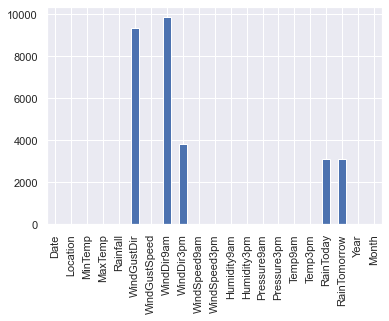

In [17]:
df_AUSWeather_drop.isna().sum().plot(kind='bar') 
plt.show()

### Create a variable to seperate all the categorical variables 

In [18]:
category = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

### Get mode for categorical data columns

In [19]:
df_AUSWeather_drop[category].mode()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,W,N,SE,No,No


### Filling the missing categorical data with mode

In [20]:
df_AUSWeather_drop.fillna(df_AUSWeather_drop[category].mode().iloc[0],inplace = True)


### Checking any column with null/missing values after filling the null/missing values using fillna()

In [21]:
df_AUSWeather_drop.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
dtype: int64

### Setting Date column as index

In [22]:
df_AUSWeather_drop.set_index('Date',inplace = True)

### Using groupby to group the dataset frequency from daily to monthly by Location column

In [23]:
grouper = df_AUSWeather_drop.groupby([pd.Grouper(freq='M'), 'Location'])


In [24]:
grouper

In [25]:
df_group= grouper.first()

In [26]:
df_group

MinTemp  MaxTemp  Rainfall WindGustDir  \
Date       Location                                                
2009-01-31 Adelaide          16.9     22.9   0.00000          SW   
           Albany            16.4     21.4   0.00000           W   
           Albury            11.3     26.5   0.00000         WNW   
           AliceSprings      22.2     36.0   0.00000          SE   
           BadgerysCreek     13.3     34.2   0.00000           W   
...                           ...      ...       ...         ...   
2016-12-31 Watsonia          13.0     26.1   0.00000           W   
           Williamtown       13.6     32.0   2.35407          NE   
           Witchcliffe       11.2     21.9   0.20000         SSW   
           Wollongong        18.4     25.0   2.35407          NW   
           Woomera           16.1     35.0   0.00000         SSW   

                          WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
Date       Location                                                           
2009-01-31 Adelaide           50.000000         SW         SW          17.0   
           Albany             40.171046          E        ESE          13.0   
           Albury             56.000000          W        WNW          19.0   
           AliceSprings       54.000000          E        ESE          22.0   
           BadgerysCreek      61.000000        NNE         SE          11.0   
...                                 ...        ...        ...           ...   
2016-12-31 Watsonia           40.171046        SSW         SW           4.0   
           Williamtown        39.000000        SSW        ENE          11.0   
           Witchcliffe        43.000000         SE          S          20.0   
           Wollongong         37.000000        ENE          N          13.0   
           Woomera            56.000000         SE        SSW          13.0   

                          WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Date       Location                                                             
2009-01-31 Adelaide          20.000000         58.0    40.000000       1011.3   
           Albany            31.000000         64.0    64.000000       1017.9   
           Albury            31.000000         46.0    26.000000       1004.5   
           AliceSprings      28.000000         18.0    12.000000       1005.8   
           BadgerysCreek     18.740093         67.0    51.561945       1005.6   
...                                ...          ...          ...          ...   
2016-12-31 Watsonia          13.000000         74.0    46.000000       1008.8   
           Williamtown       17.000000         82.0    31.000000       1008.5   
           Witchcliffe       22.000000         45.0    45.000000       1017.5   
           Wollongong        17.000000         68.0    73.000000       1007.3   
           Woomera           28.000000         39.0    18.000000       1008.3   

                          Pressure3pm  Temp9am    Temp3pm RainToday  \
Date       Location                                                   
2009-01-31 Adelaide       1012.400000     18.1  22.500000        No   
           Albany         1015.600000     19.4  20.800000        No   
           Albury         1003.200000     19.7  25.700000        No   
           AliceSprings   1002.900000     29.0  35.000000        No   
           BadgerysCreek  1015.251039     21.0  21.583429        No   
...                               ...      ...        ...       ...   
2016-12-31 Watsonia       1005.400000     16.0  25.000000        No   
           Williamtown    1005.700000     18.2  29.200000        No   
           Witchcliffe    1016.300000     19.1  19.400000        No   
           Wollongong     1005.300000     22.7  22.700000        No   
           Woomera        1006.100000     23.3  33.800000        No   

                         RainTomorrow  Year  Month  
Date       Location                                 
2009-01-31 Adelaide          

### Reset index column

In [27]:
df_group.reset_index(inplace = True)
df_group

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,2009-01-31,Adelaide,16.9,22.9,0.00000,SW,50.000000,SW,SW,17.0,...,58.0,40.000000,1011.3,1012.400000,18.1,22.500000,No,No,2009,1
1,2009-01-31,Albany,16.4,21.4,0.00000,W,40.171046,E,ESE,13.0,...,64.0,64.000000,1017.9,1015.600000,19.4,20.800000,No,No,2009,1
2,2009-01-31,Albury,11.3,26.5,0.00000,WNW,56.000000,W,WNW,19.0,...,46.0,26.000000,1004.5,1003.200000,19.7,25.700000,No,No,2009,1
3,2009-01-31,AliceSprings,22.2,36.0,0.00000,SE,54.000000,E,ESE,22.0,...,18.0,12.000000,1005.8,1002.900000,29.0,35.000000,No,No,2009,1
4,2009-01-31,BadgerysCreek,13.3,34.2,0.00000,W,61.000000,NNE,SE,11.0,...,67.0,51.561945,1005.6,1015.251039,21.0,21.583429,No,No,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,2016-12-31,Watsonia,13.0,26.1,0.00000,W,40.171046,SSW,SW,4.0,...,74.0,46.000000,1008.8,1005.400000,16.0,25.000000,No,No,2016,12
4412,2016-12-31,Williamtown,13.6,32.0,2.35407,NE,39.000000,SSW,ENE,11.0,...,82.0,31.000000,1008.5,1005.700000,18.2,29.200000,No,No,2016,12
4413,2016-12-31,Witchcliffe,11.2,21.9,0.20000,SSW,43.000000,SE,S,20.0,...,45.0,45.000000,1017.5,1016.300000,19.1,19.400000,No,No,2016,12
4414,2016-12-31,Wollongong,18.4,25.0,2.35407,NW,37.000000,ENE,N,13.0,...,68.0,73.000000,1007.3,1005.300000,22.7,22.700000,No,No,2016,12


### Drop column Location

In [28]:
df_group.drop(columns = 'Location',inplace = True)

### creating new column AvgTemp

In [29]:
df_group['AvgTemp'] = (df_group['MaxTemp']+df_group['MinTemp'])/2

### Countplot is to check the data destribution in the dataset

C:\Users\shan2\Anaconda3\envs\Magespy\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2010'),
  Text(2, 0, '2011'),
  Text(3, 0, '2012'),
  Text(4, 0, '2013'),
  Text(5, 0, '2014'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016')])

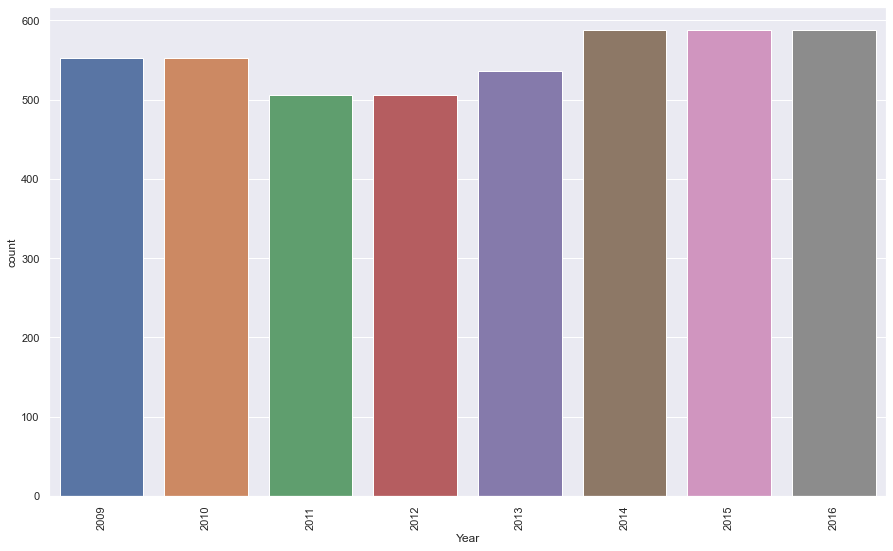

In [30]:
plt.figure(figsize=(15,9)) 
sns.countplot(df_group['Year'])
plt.xticks(rotation = 90)

### Create api key path

In [31]:
# print(os.getenv("PATH"))
username = 'Yog31'

api_key = os.getenv("api_key")

### Import chart studio and setting the credentials 

In [32]:
import chart_studio

username = 'Yog31'
api_key = api_key
chart_studio.tools.set_credentials_file(username =username,api_key = api_key)

import chart_studio.plotly as py
import chart_studio.tools as tls

### Does the change in temperature and humidity, over the 8 years have led to higher or lower rainfall?


### Box plot to find the avg temperature pattern over the 8 years

In [63]:
first_plot= fig = go.Figure()
fig.add_trace(go.Box(
    y=df_group['AvgTemp'],
    x=df_group['Year'],
    marker_color='rgb(7,40,89)',
))

fig.update_layout(title='Avg Temperature change over 8 Years')
fig.show()

### Getting the plot to plotly chart studio

In [34]:
py.plot(first_plot,filename = 'Avg Temperature change over 8 Years',auto_open = False)

'https://plotly.com/~Yog31/9/'

### Seperating rainfall greater than 0 mm & equal than 0 mm-plot in stacked bar chart

In [35]:
d = df_group[df_group['Rainfall'] > 0].groupby('Year').count() #seperating rainfall greater than 0 mm
more_rain = d['Rainfall']

c = df_group[df_group['Rainfall'] == 0].groupby('Year').count() #seperating rainfall equal than 0 mm
zero_rain = c['Rainfall']

percent = round((d/(d+c))*100,2)
p = percent['Rainfall'].astype(str)+'%'
p

a = (100-percent)
q = a['Rainfall'].astype(str)+'%'

second_plot =plot = go.Figure(data=[go.Bar(
    name = 'Rainfall',
    x = more_rain,
    text = p
   ),
                       go.Bar(
    name = 'No Rainfall',                       
    x = zero_rain,
    text = q                   
   )
])
 
plot.update_layout(
    title_text="Actual Rainfall Count vs Zero Rainfall Count over 8 Years"
)

plot.update_yaxes(
    title_text = "Years",
    ticktext = ['2009','2010','2011','2012','2013','2014','2015','2016'],
    tickvals= ['0','1','2','3','4','5','6','7']
)

plot.update_layout(barmode='stack')
                  
plot.show()



### Getting the plot to plotly chart studio

In [36]:
py.plot(second_plot,filename = 'Actual Rainfall Count vs Zero Rainfall Count over 8 Years',auto_open = True)

'https://plotly.com/~Yog31/14/'

### Get the Rainfall more than zero- Scatter plot - Humidity vs Rainfall

In [37]:
df = df_group[df_group['Rainfall'] > 0]
three_plot = fig = px.scatter(df, x="Humidity9am", y="Rainfall",color_discrete_sequence=['purple'],
                              title = 'Humidity vs Rainfall',labels=dict(Humidity9am="Humidity"))
fig.show()

### Getting the plot to plotly chart studio

In [38]:
py.plot(three_plot,filename = 'Humidity vs Rainfall',auto_open = False)

'https://plotly.com/~Yog31/12/'

### Joinplot - Avg Temperature vs Humidity

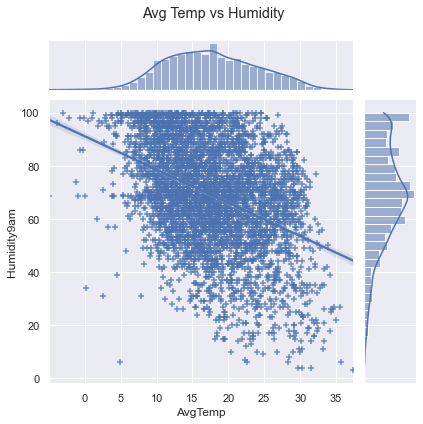

In [39]:
a = sns.jointplot(x='AvgTemp', y='Humidity9am', data=df_group, kind='reg',marker="+")
a.fig.suptitle('Avg Temp vs Humidity')
a.fig.subplots_adjust(top=0.90)
a.savefig('Avg Temp vs Humidity.png', dpi=300,transparent = True)

### Scatter plot - Avg Temperature & Humidity vs Rainfall over the 8 Years

In [40]:
forth_plot=fig = px.scatter(df_group, x="AvgTemp", y="Humidity9am",
         size="Rainfall", color="Rainfall",
                 hover_name="AvgTemp", size_max=60,title = 'Avg Temperature & Humidity vs Rainfall over the 8 Years',labels=dict(Humidity9am="Humidity") )
fig.show()

### Getting the plot to plotly chart studio

In [41]:
py.plot(forth_plot,filename = 'Avg Temperature & Humidity vs Rainfall over the 8 Years',auto_open = False)

'https://plotly.com/~Yog31/17/'

###  How do the wind speed, and wind direction affect the rainfall? 

### Scatter plot - Wind Speed vs Rainfall

In [42]:
fifth_plot=fig = px.scatter(df_group, x="WindSpeed9am", y="Rainfall", color="Rainfall", width=800, hover_data=['WindSpeed9am', 'Rainfall','WindDir9am'],title ='Wind Speed vs Rainfall',
                labels=dict(WindSpeed9am="Wind Speed(km/h)"))
fig.show()

### Getting the plot to plotly chart studio

In [43]:
py.plot(fifth_plot,filename = 'Wind Speed vs Rainfall',auto_open = False)

'https://plotly.com/~Yog31/19/'

### Plotting Wind Speed and Direction vs Actual Rainfall

In [44]:
sixth_plot = fig = px.bar_polar(df_group, r="WindSpeed9am", theta="WindDir9am",
                   color="Rainfall", template="plotly",
                   color_continuous_scale=px.colors.diverging.BrBG,
                   title = 'Wind Speed and Direction vs Actual Rainfall')
fig.show()

### Getting the plot to plotly chart studio

In [45]:
py.plot(sixth_plot,filename = 'Wind Speed and Direction vs Actual Rainfall',auto_open = False)

'https://plotly.com/~Yog31/22/'

### Plotting Wind Speed and Direction vs Rainfall Prediction

In [46]:
seventh_plot=fig = px.bar_polar(df_group, r="WindSpeed9am", theta="WindDir9am",
                   color="RainTomorrow", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                   title = 'Wind Speed and Direction vs Rainfall Prediction')
fig.show()

### Getting the plot to plotly chart studio

In [47]:
py.plot(seventh_plot,filename = 'Wind Speed and Direction vs Rainfall Prediction',auto_open = False)

'https://plotly.com/~Yog31/25/'

### Is the change in pressure level, Over the 8 years, led to higher or lower rainfall?

### Scatter plot - Pressure vs Rainfall

In [48]:
eight_plot = fig = px.scatter(df_group, x='Pressure9am', y='Rainfall',hover_data=['Pressure9am','Rainfall'],
                 color_discrete_sequence=['darkkhaki'],
                title = 'Pressure vs Rainfall',labels=dict(Pressure9am="Pressure"))
fig.show()

### Getting the plot to plotly chart studio

In [49]:
py.plot(eight_plot,filename = 'Pressure vs Rainfall',auto_open = False)

'https://plotly.com/~Yog31/27/'

### How do the humid level and pressure impact the rainfall and prediction?

### Joint plot - Pressure vs Humidity

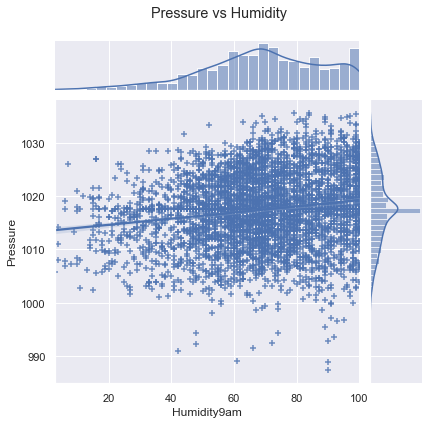

In [50]:
b = sns.jointplot(x='Humidity9am', y='Pressure9am', data=df_group, kind='reg',marker="+")
b.ax_joint.set_ylabel('Pressure')
b.fig.suptitle('Pressure vs Humidity')
b.fig.subplots_adjust(top=0.90)

### Scatter plot - Humidity & Pressure vs Rainfall

In [51]:
df = df_group[df_group['Rainfall'] > 0]
ninth_plot = fig = px.scatter(df, x="Humidity9am", y="Pressure9am", color="Rainfall", width=800, hover_data=['Pressure9am', 'Rainfall','Humidity9am'],
                              title = 'Humidity & Pressure vs Rainfall',labels=dict(Pressure9am="Pressure",Humidity9am = 'Humidity'))
fig.show()

### Getting the plot to plotly chart studio

In [52]:
py.plot(ninth_plot,filename = 'Humidity & Pressure vs Rainfall',auto_open = False)

'https://plotly.com/~Yog31/29/'

### How does the change in pressure, temperature, and humidity affect rainfall?


### Joint plot - Pressure vs Avg Temperature

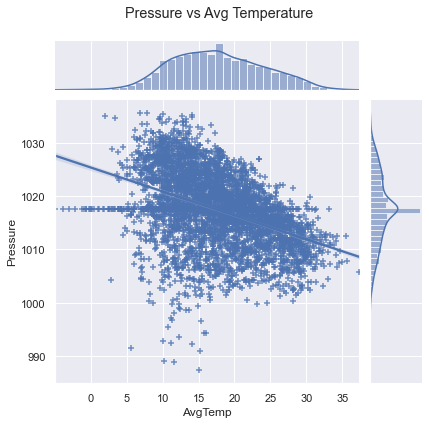

In [53]:
c = sns.jointplot(x='AvgTemp', y='Pressure9am', data=df_group, kind='reg',marker="+")
c.ax_joint.set_ylabel('Pressure')
c.fig.suptitle('Pressure vs Avg Temperature')
c.fig.subplots_adjust(top=0.90)

### Scatter plot - Year 2013 & 3014 Pattern of Avg Temperature change with Humidity & Pressure

In [54]:
df = df_group[df_group['Year'] == 2013]
fig_2013 = px.scatter(df, x="Humidity9am", y="Pressure9am", color="AvgTemp", facet_col="Year",
                     title = 'Humidity & Pressure vs Avg Temperature in Year 2013',labels=dict(Pressure9am="Pressure",Humidity9am = 'Humidity'))
fig_2013.show()

df = df_group[df_group['Year'] == 2014]
fig_2014 = px.scatter(df, x="Humidity9am", y="Pressure9am", color="AvgTemp", facet_col="Year",
                     title = 'Humidity & Pressure vs Avg Temperature in Year 2014',labels=dict(Pressure9am="Pressure",Humidity9am = 'Humidity'))
fig_2014.show()

### Getting the plot to plotly chart studio

In [55]:
py.plot(fig_2013,filename = 'Humidity & Pressure vs Avg Temperature in Year 2013',auto_open = False)

'https://plotly.com/~Yog31/45/'

In [56]:
py.plot(fig_2014,filename = 'Humidity & Pressure vs Avg Temperature in Year 2014',auto_open = False)

'https://plotly.com/~Yog31/47/'

### Changes in wind gust direction and speed impacting rainfall

### Plotting - Wind Gust Speed & Wind Gust Direction vs Rainfall

In [57]:
z = df_group[df_group['Rainfall'] != 0]
ten_plot = fig = px.bar_polar(z, r="WindGustSpeed", theta="WindGustDir",
                   color="Rainfall", template="plotly",
                   color_discrete_sequence= px.colors.sequential.Blues,title = 'Wind Gust Speed & Wind Gust Direction vs Rainfall')
fig.show()

### Getting the plot to plotly chart studio

In [58]:
py.plot(ten_plot,filename = 'Wind Gust Speed & Wind Gust Direction vs Rainfall',auto_open = False)

'https://plotly.com/~Yog31/109/'

### Pearson correlation

In [59]:
cr =df_group[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']].corr(method='pearson')
cr

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736980,0.100774,0.198860,0.189024,0.205835,-0.241748,-0.028156,-0.452546,-0.499172,0.892792,0.708042
MaxTemp,0.736980,1.000000,-0.089847,0.102482,0.019353,0.097462,-0.501401,-0.526468,-0.345672,-0.474446,0.880877,0.972756
Rainfall,0.100774,-0.089847,1.000000,0.111678,0.070356,0.055547,0.247718,0.296093,-0.133427,-0.095472,-0.005182,-0.086243
WindGustSpeed,0.198860,0.102482,0.111678,1.000000,0.572691,0.662578,-0.235736,-0.076389,-0.458661,-0.393630,0.171185,0.062655
WindSpeed9am,0.189024,0.019353,0.070356,0.572691,1.000000,0.534407,-0.267806,-0.015474,-0.239155,-0.170278,0.138951,-0.002482
WindSpeed3pm,0.205835,0.097462,0.055547,0.662578,0.534407,1.000000,-0.171668,-0.024667,-0.297733,-0.242455,0.192424,0.064029
Humidity9am,-0.241748,-0.501401,0.247718,-0.235736,-0.267806,-0.171668,1.000000,0.661053,0.168089,0.220172,-0.490183,-0.489603
Humidity3pm,-0.028156,-0.526468,0.296093,-0.076389,-0.015474,-0.024667,0.661053,1.000000,0.035547,0.114859,-0.256641,-0.571020
Pressure9am,-0.452546,-0.345672,-0.133427,-0.458661,-0.239155,-0.297733,0.168089,0.035547,1.000000,0.950643,-0.424139,-0.299139
Pressure3pm,-0.499172,-0.474446,-0.095472,-0.393630,-0.170278,-0.242455,0.220172,0.114859,0.950643,1.000000,-0.510785,-0.434253


### Plotting  Pearson correlation

In [60]:
eleven_plot = fig = go.Figure(go.Heatmap(x = cr.columns, y = cr.columns, z = cr.values.tolist(),colorscale = 'rdylgn',zmin = -1 , zmax = 1))
fig.update_layout(
    title_text="Pearson correlation")
fig.show()

### Getting the plot to plotly chart studio

In [61]:
py.plot(eleven_plot,filename = 'Pearson correlation',auto_open = False)

'https://plotly.com/~Yog31/43/'